# <center>Classification des chiffres manuscrites</center>

## Partie 1 : Base de données, Analyse et Préparation

In [17]:
import os
import struct
import sys
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image 
import matplotlib.pyplot as plt

## Dossier "training"

In [18]:
from tqdm import tqdm

directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_training\\"

X_train = []
# liste pour enregistrer les labels
y_train = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        X_train.append(image)
        y_train.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.05s/it]


## Informations

In [19]:
X_train = np.array(X_train)

print( 'classe :', type(X_train) )
print( 'type :', X_train.dtype )
print( 'taille :', X_train.shape )
print( 'modifiable :', X_train.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (60000, 28, 28, 3)
modifiable : True


In [20]:
# plt.imshow( liste_images[1] )
# plt.show()

## Nuance de Gris

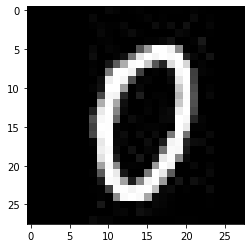

In [21]:
grey_image = cv2.cvtColor(X_train[1], cv2.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap = 'Greys_r')
plt.show()

In [22]:
X_train_gris = []

for x in tqdm(X_train):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    X_train_gris.append(grey_image)
        

100%|████████████████████████████████████████████████████████████████████████| 60000/60000 [00:00<00:00, 164134.39it/s]


## Dossier "testing"

In [23]:
directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_testing\\"

X_test = []
# liste pour enregistrer les labels
y_test = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        X_test.append(image)
        y_test.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


In [24]:
X_test = np.array(X_test)

print( 'classe :', type(X_test) )
print( 'type :', X_test.dtype )
print( 'taille :', X_test.shape )
print( 'modifiable :', X_test.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (10000, 28, 28, 3)
modifiable : True


In [25]:
X_test_gris = []

for x in tqdm(X_test):
    grey_image = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    X_test_gris.append(grey_image)

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 144968.60it/s]


---

## Normalisation des données 

In [26]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
# Normalisation pixel (entre 0 et 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualisation des données

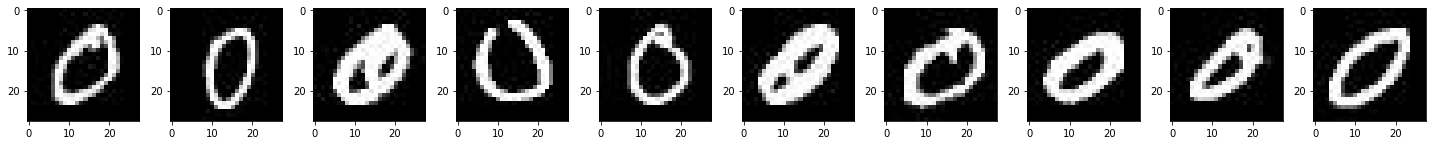

In [28]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

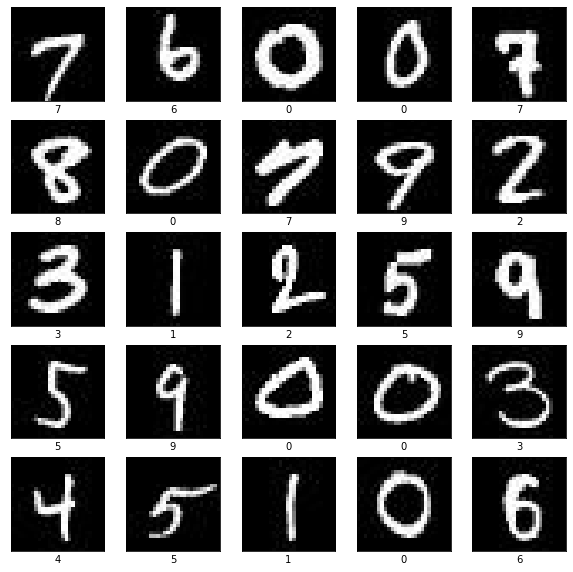

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    nbr = np.random.randint(0, 60000, [1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[nbr[0]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[nbr[0]])
plt.show()

In [30]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28, 3)
Y_train: (60000,)
X_test:  (10000, 28, 28, 3)
Y_test:  (10000,)


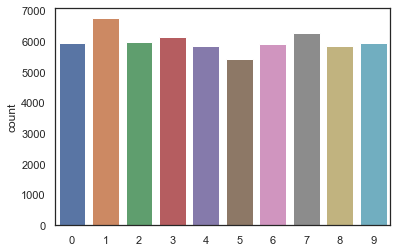

In [31]:
import seaborn as sns

# Visualisation de la répartition des labels
sns.set(style='white', context='notebook', palette='deep')
ax = sns.countplot(y_train)

In [32]:
# # 1. Split entre jeu d'entrainement et jeu de validation avec un ratio de 90/10
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [33]:
# # 2. Reshape des data pour les formatter en 28x28x1
# X_train = X_train.values.reshape(-1, 28,28,1)
# X_val = X_val.values.reshape(-1, 28,28,1)

---

## Partie 2 : Architecture CNN sur Tensorflow

In [34]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Configuration des couches du réseau
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Compilation et entraînement du modèle

In [38]:
# Compilation du modele
# model.compile(optimizer='adam',
#               loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Entrainement du modele
# history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 41s 22ms/step - loss: 0.1392 - accuracy: 0.9561 - val_loss: 0.0602 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0460 - accuracy: 0.9863 - val_loss: 0.0502 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0307 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0378 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0317 - val_accura

### Evaluation du modèle

In [39]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0351 - accuracy: 0.9914
Test accuracy: 0.9914000034332275


313/313 [==============================] - 3s 9ms/step - loss: 0.0351 - accuracy: 0.9914


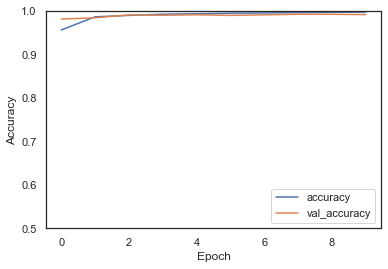

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)#, verbose=2)

In [41]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


## Sauvegarde du modèle 

In [42]:
filepath='./modelCNN'
tf.keras.models.save_model(model, filepath, overwrite=True,
                           include_optimizer=True, save_format=None,
                           signatures=None, options=None, save_traces=True)
loaded_model = tf.keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./modelCNN\assets


### Création de y (pour les mesures)

In [43]:


directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_training\\"


# liste pour enregistrer les labels
y_train = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        y_train.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.10s/it]


In [44]:
directory = ".\\data\\MNIST_Dataset_JPG_format\\MNIST_JPG_testing\\"


# liste pour enregistrer les labels
y_train = []
# l va servir à numéroter les labels : dans la boucle, l s'incrémente de 1 à chaque passage 
l = -1


for x in tqdm(os.listdir(directory)):
    # incrémentation de l
    l = l +1
    for y in os.listdir(directory + x +"\\"):
        image = cv2.imread(directory + x +"\\"+y)
        y_train.append(l)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.30it/s]


### Accuracy score

In [45]:
from sklearn.metrics import accuracy_score

#Generate predictions with the model using our X values

y_pred = model.predict(X_test)
y_true = np.argmax(y_pred,axis=1)

y = y_train
y=np.array(y)

accuracy = accuracy_score(y, np.argmax(y_pred, axis=1))
print("L'accuraccy_score est de : ", accuracy)

L'accuraccy_score est de :  0.9902


### Classification report

In [46]:
import sklearn.metrics as metrics

print(metrics.classification_report (y_test, y_true))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Matrice de confusion

In [47]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_true)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   0    2 1023    0    1    0    0    4    2    0]
 [   0    1    3  998    0    4    0    2    2    0]
 [   0    0    1    0  975    0    1    0    0    5]
 [   2    0    0    4    0  881    3    1    0    1]
 [   3    1    0    0    1   12  941    0    0    0]
 [   0    5    2    0    0    1    0 1014    0    6]
 [   0    1    2    0    0    0    1    2  967    1]
 [   1    1    0    0    7    3    0    1    4  992]]


<AxesSubplot:>

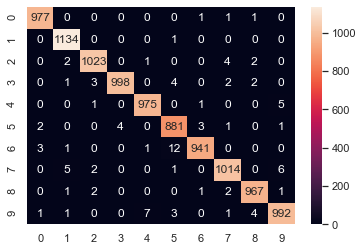

In [48]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt="d")

## Partie 3 : Application

In [81]:
chemin = "./test_pictures/"
liste_test = os.listdir(chemin) 
print(liste_test)

['img_1.jpg', 'img_10.jpg', 'img_100.jpg', 'img_101.jpg', 'img_102.jpg', 'img_103.jpg', 'img_104.jpg', 'img_105.jpg', 'img_106.jpg', 'img_107.jpg', 'img_108.jpg', 'img_109.jpg', 'img_11.jpg', 'img_110.jpg', 'img_111.jpg', 'img_112.jpg', 'img_113.jpg', 'img_114.jpg', 'img_115.jpg', 'img_116.jpg', 'img_117.jpg', 'img_118.jpg', 'img_119.jpg', 'img_12.jpg', 'img_120.jpg', 'img_121.jpg', 'img_122.jpg', 'img_123.jpg', 'img_124.jpg', 'img_125.jpg', 'img_126.jpg', 'img_127.jpg', 'img_128.jpg', 'img_129.jpg', 'img_13.jpg', 'img_130.jpg', 'img_131.jpg', 'img_132.jpg', 'img_133.jpg', 'img_134.jpg', 'img_135.jpg', 'img_136.jpg', 'img_137.jpg', 'img_138.jpg', 'img_139.jpg', 'img_14.jpg', 'img_140.jpg', 'img_141.jpg', 'img_142.jpg', 'img_143.jpg', 'img_144.jpg', 'img_145.jpg', 'img_146.jpg', 'img_147.jpg', 'img_148.jpg', 'img_149.jpg', 'img_15.jpg', 'img_150.jpg', 'img_151.jpg', 'img_152.jpg', 'img_153.jpg', 'img_154.jpg', 'img_155.jpg', 'img_156.jpg', 'img_157.jpg', 'img_158.jpg', 'img_159.jpg', 'i

In [82]:
import random

# choisi une image aléatoire à chaque fois
rand = random.choice(liste_test)
print(rand)

img_327.jpg


In [83]:
# on décide du nouveau chemin de l'élément aléatoire
route = "./test_pictures/" + rand
print(route)

./test_pictures/img_327.jpg


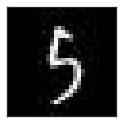

In [84]:
# on affiche l'élément aléatoire avec la variable route
image = cv2.imread(route)

plt.figure(figsize=(2,2))
plt.subplot()
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

## On teste la prédiction 

In [85]:
## Formatage des images 

img_array = np.array(image)/255.0
img = np.expand_dims(img_array, axis=0)


In [86]:
liste_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
loaded_model = tf.keras.models.load_model(filepath)
prediction = loaded_model.predict(img)

resultat = liste_label[np.argmax(prediction)]
print('Prédiction :',resultat)


Prédiction : 5


## Application fichier.py

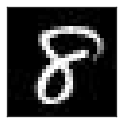

Prédiction : 8


In [87]:
%run test.py